In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [22]:
df=pd.read_csv("/content/sample_data/exam_data.csv")

In [7]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72.0,74.0
1,female,group C,some college,standard,completed,69,90.0,88.0
2,female,group B,master's degree,standard,none,90,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47,57.0,44.0
4,male,group C,some college,standard,none,76,78.0,75.0
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99.0,95.0
996,male,group C,high school,free/reduced,none,62,55.0,55.0
997,female,group C,high school,free/reduced,completed,59,71.0,65.0
998,female,group D,some college,standard,completed,68,78.0,77.0


In [8]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     8
reading score                  6
writing score                  9
dtype: int64

In [9]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                      object
reading score                  float64
writing score                  float64
dtype: object

In [11]:
df["math score"]

0      72
1      69
2      90
3      47
4      76
       ..
995    88
996    62
997    59
998    68
999    77
Name: math score, Length: 1000, dtype: object

In [12]:
df["math score"].unique()

array(['72', '69', '90', '47', '76', '71', '88', '40', '64', '38', '58',
       '65', '78', '50', nan, '74', '73', '67', '70', '62', '63', '56',
       '81', '75', '57', '55', '53', '59', '66', '82', '77', '33', '52',
       '0', '79', '39', '45', '60', '61', '41', '49', '44', '30', '80',
       '42', '27', '43', '68', '85', '98', '87', '54', '51', '99', '84',
       '91', '83', '89', '22', '100', '96', '94', '46', '97', '48', '35',
       '34', '86', '92', '37', '28', '24', '113', '123', '?', '-89', '26',
       '334', '95', '36', '29', '32', '93', '19', '23', '8'], dtype=object)

**Changing datatype and removing non numeric values like ?**

In [23]:
df["math score"]=df["math score"].replace('?',np.nan)

In [24]:
df["math score"]=df["math score"].astype("float64")

In [25]:
df.isnull().sum()

gender                          0
race/ethnicity                  0
parental level of education     0
lunch                           0
test preparation course         0
math score                     43
reading score                   6
writing score                   9
dtype: int64

In [26]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

**Fill Null values with the mean, median and mode**

In [27]:
df["math score"]=df["math score"].fillna(df["math score"].mean())

In [28]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  6
writing score                  9
dtype: int64

In [29]:
df["reading score"]=df["reading score"].fillna(df["reading score"].mean())

In [30]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  9
dtype: int64

In [32]:
df["writing score"]=df["writing score"].fillna(df["writing score"].median())

In [33]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

<Axes: >

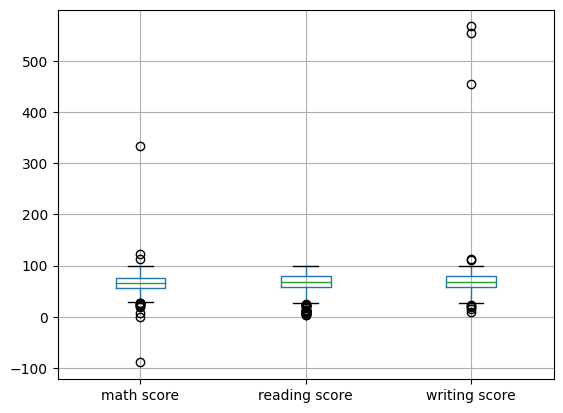

In [38]:
df.boxplot()

**Removing outliers Manually**

<Axes: >

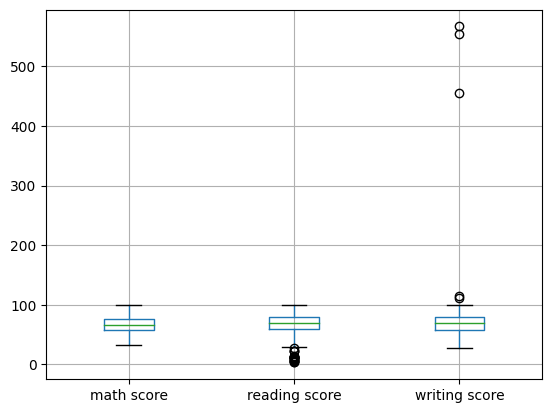

In [45]:
lower=df["math score"]>30
upper=df["math score"]<100
df=df[(lower)& (upper)]
df.boxplot()

In [46]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72.0,72.0,74.0
1,female,group C,some college,standard,completed,69.0,90.0,88.0
2,female,group B,master's degree,standard,none,90.0,95.0,93.0
3,male,group A,associate's degree,free/reduced,none,47.0,57.0,44.0
4,male,group C,some college,standard,none,76.0,78.0,75.0


**Removing outliers using Z score treatment**


In [47]:
def trim(col: pd.core.series.Series):
  upperlimit = col.mean() + 3 * col.std()
  lowerlimit = col.mean() - 3 * col.std()
  newcol=col[(col<upperlimit) & (col>lowerlimit)]
  return newcol


<Axes: xlabel='reading score'>

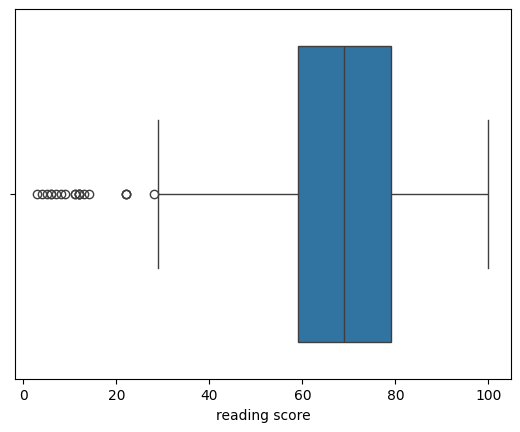

In [49]:
sns.boxplot(data=df,x=df["reading score"])

In [50]:
readingcol=trim(df["reading score"])


<Axes: xlabel='reading score'>

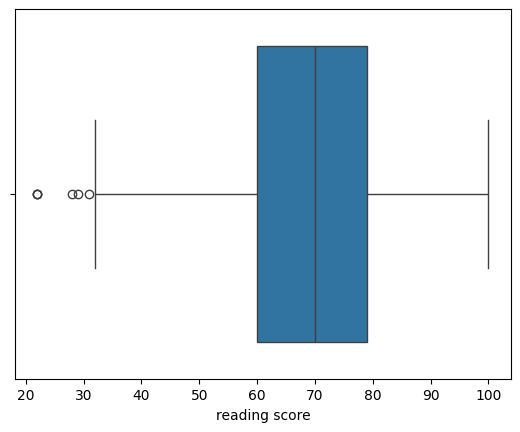

In [52]:
sns.boxplot(data=df,x=readingcol)

**Removing Outliers using IQR**

In [54]:
def iqr(col : pd.core.series.Series) :
  Q1 = col.quantile(0.25)
  Q3 = col.quantile(0.75)
  IQR = Q3 - Q1
  lowerLimit = Q1 - 1.5 * IQR
  upperLimit = Q3 + 1.5 * IQR

  newCol = col[ (col < upperLimit) & (col > lowerLimit) ]
  return newCol

<Axes: xlabel='writing score'>

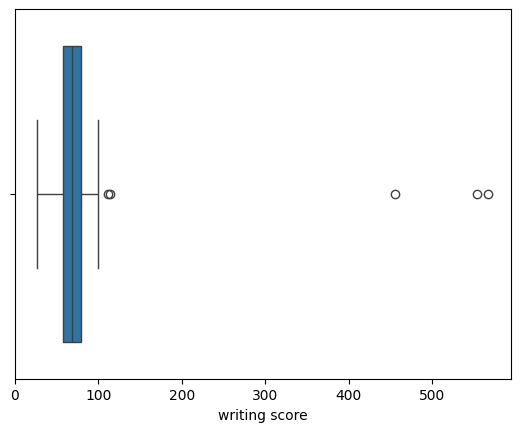

In [53]:
sns.boxplot(data=df,x=df["writing score"])

In [55]:
writingcol=iqr(df["writing score"])

<Axes: xlabel='writing score'>

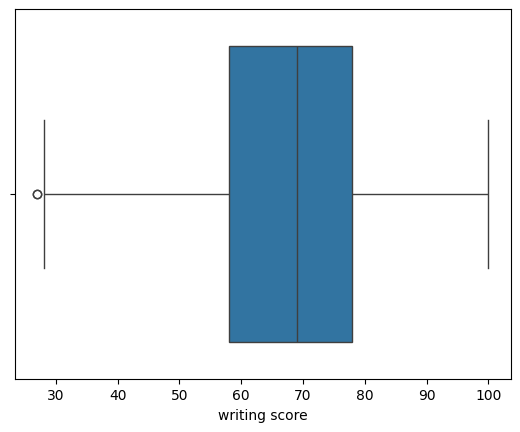

In [57]:
sns.boxplot(data=df,x=writingcol)

In [58]:
df.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                     float64
reading score                  float64
writing score                  float64
dtype: object

**Min - Max Normalization**

In [59]:
df["reading score"]=(df["reading score"]- df["reading score"].min())/(df["reading score"].max()-df["reading score"].min())

In [61]:
df["reading score"]

0      0.711340
1      0.896907
2      0.948454
3      0.556701
4      0.773196
         ...   
995    0.989691
996    0.536082
997    0.701031
998    0.773196
999    0.855670
Name: reading score, Length: 974, dtype: float64

**Z-Score Normalization**

In [62]:
df["writing score"]=(df["writing score"]-df["writing score"].mean())/(df["writing score"].std())

In [63]:
df["writing score"]

0      0.142275
1      0.620710
2      0.791580
3     -0.882945
4      0.176449
         ...   
995    0.859928
996   -0.507031
997   -0.165291
998    0.244797
999    0.552362
Name: writing score, Length: 974, dtype: float64